### Inception Module
---
In general, when we try to use a deeper model to fit a complex dataset, there are high chances of the model overfitting during training, specially when the dataset is not large enough.

This is where the inception layer comes in. The inception layer is a combination of three or more Convolutional layers (example, 1×1 Convolutional layer, 3×3 Convolutional layer, 5×5 Convolutional layer) and outputs from all Convolutional layers are  concatenated to form a  single output vector which is input to following layer.

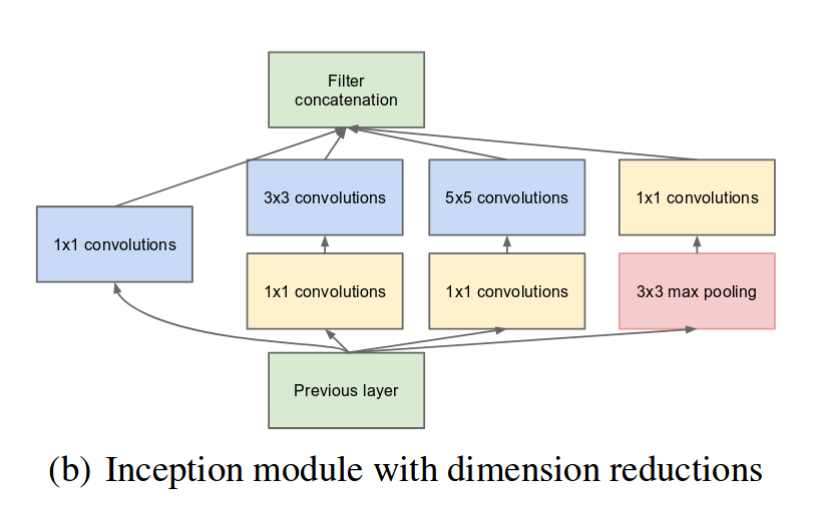

Intuitively, this also has the advantage of viewing the image through multiple receptive fields as opposed to just one.

### Inception in TensorFlow
---

In [ ]:
from tensorflow.keras import datasets, layers, models, losses
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
def make_model_without_inception(input):
  conv_1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(input)
  bn_1 = BatchNormalization()(conv_1)
  conv_2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(bn_1)
  bn_2 = BatchNormalization()(conv_2)
  pool_1 = MaxPooling2D((2, 2))(bn_2)

  conv_3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_1)
  bn_3 = BatchNormalization()(conv_3)
  conv_4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(bn_3)
  bn_4 = BatchNormalization()(conv_4)
  pool_2 = MaxPooling2D((2, 2))(bn_4)

  conv_5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_2)
  bn_5 = BatchNormalization()(conv_5)
  conv_6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(bn_5)
  bn_6 = BatchNormalization()(conv_6)
  pool_3 = MaxPooling2D((2, 2))(bn_6)

  flatten = Flatten()(pool_3)
  dense_1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flatten)
  output = Dense(10, activation='softmax')(dense_1)

  return output

In [ ]:
input = Input(shape=(32,32,3))
model_without_inception = Model(input, make_model_without_inception(input))

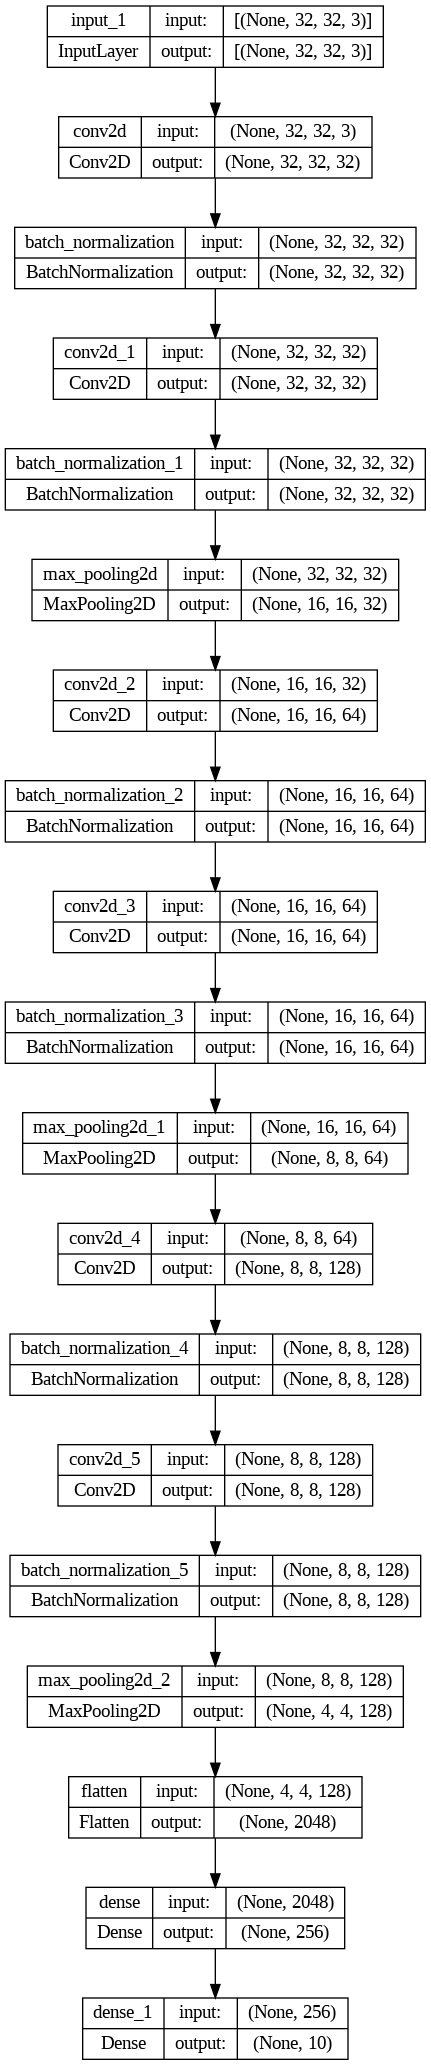

In [ ]:
tf.keras.utils.plot_model(model_without_inception, show_shapes=True)

In [ ]:
model_without_inception.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_without_inception.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_without_inception = model_without_inception.fit(train_images, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_images, test_labels))

Epoch 1/10
196/196 [==============================] - 21s 35ms/step - loss: 1.4731 - accuracy: 0.5082 - val_loss: 2.2836 - val_accuracy: 0.2850
Epoch 2/10
196/196 [==============================] - 7s 36ms/step - loss: 0.8881 - accuracy: 0.6880 - val_loss: 1.0992 - val_accuracy: 0.6123
Epoch 3/10
196/196 [==============================] - 6s 31ms/step - loss: 0.6728 - accuracy: 0.7628 - val_loss: 0.8558 - val_accuracy: 0.7039
Epoch 4/10
196/196 [==============================] - 6s 29ms/step - loss: 0.5283 - accuracy: 0.8139 - val_loss: 0.7959 - val_accuracy: 0.7313
Epoch 5/10
196/196 [==============================] - 6s 29ms/step - loss: 0.4033 - accuracy: 0.8590 - val_loss: 0.8268 - val_accuracy: 0.7402
Epoch 6/10
196/196 [==============================] - 6s 30ms/step - loss: 0.3032 - accuracy: 0.8933 - val_loss: 0.8491 - val_accuracy: 0.7397
Epoch 7/10
196/196 [==============================] - 6s 31ms/step - loss: 0.2123 - accuracy: 0.9258 - val_loss: 0.8641 - val_accuracy: 0.754

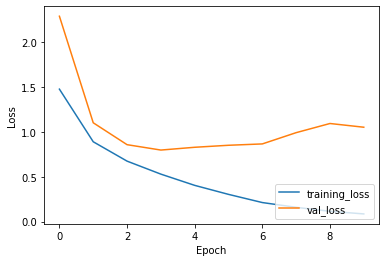

In [ ]:
plt.plot(history_without_inception.history['loss'], label='training_loss')
plt.plot(history_without_inception.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

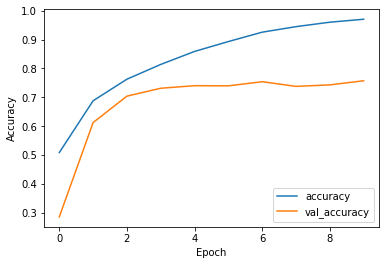

In [ ]:
plt.plot(history_without_inception.history['accuracy'], label='accuracy')
plt.plot(history_without_inception.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model_without_inception.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.0497 - accuracy: 0.7573 - 1s/epoch - 4ms/step


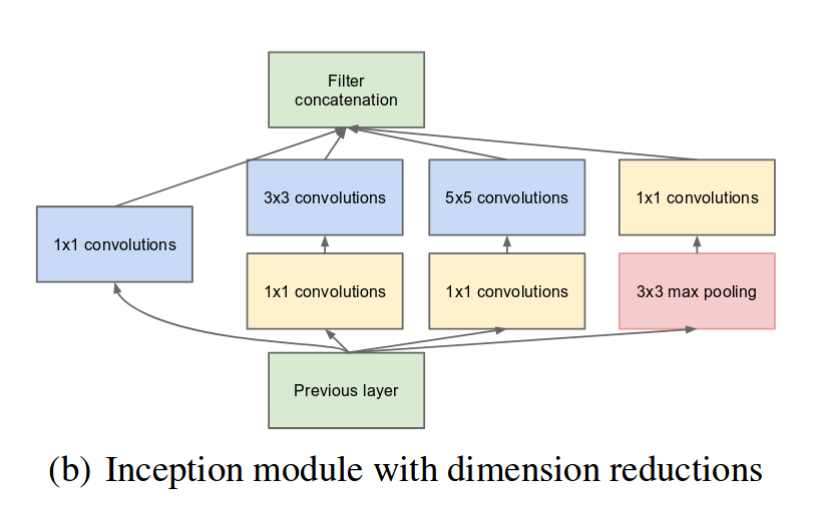


In [ ]:
def InceptionModule(layer_in, f1, f2, f3):
	# 1x1 conv
  conv1_alone = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)

  # 3x3 conv
  conv1_3x3 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(conv1_3x3)

	# 5x5 conv
  conv1_5x5 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
  conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(conv1_5x5)

	# 3x3 max pooling
  pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
  conv1_pool = Conv2D(f1, (1,1), padding='same', activation='relu')(pool)

	# concatenate filters, assumes filters/channels last
  layer_out = concatenate([conv1_alone, conv3, conv5, conv1_pool], axis=-1)
  return layer_out

In [ ]:
def make_model_with_inception(input):
  conv_1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(input)
  bn_1 = BatchNormalization()(conv_1)
  conv_2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(bn_1)
  bn_2 = BatchNormalization()(conv_2)
  pool_1 = MaxPooling2D((2, 2))(bn_2)

  inception_1 = InceptionModule(pool_1, 64, 128, 32)
  bn_3 = BatchNormalization()(inception_1)
  pool_2 = MaxPooling2D((2, 2))(bn_3)

  inception_2 = InceptionModule(pool_2, 64, 128, 32)
  bn_4 = BatchNormalization()(inception_2)
  pool_3 = MaxPooling2D((2, 2))(bn_4)

  inception_3 = InceptionModule(pool_3, 64, 128, 32)
  bn_5 = BatchNormalization()(inception_3)
  pool_4 = MaxPooling2D((2, 2))(bn_5)

  inception_4 = InceptionModule(pool_3, 64, 128, 32)
  bn_6 = BatchNormalization()(inception_4)
  pool_5 = MaxPooling2D((2, 2))(bn_6)

  flatten = Flatten()(pool_5)
  dense_1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flatten)
  output = Dense(10, activation='softmax')(dense_1)

  return output

In [ ]:
input = Input(shape=(32,32,3))
model_with_inception = Model(input, make_model_with_inception(input))

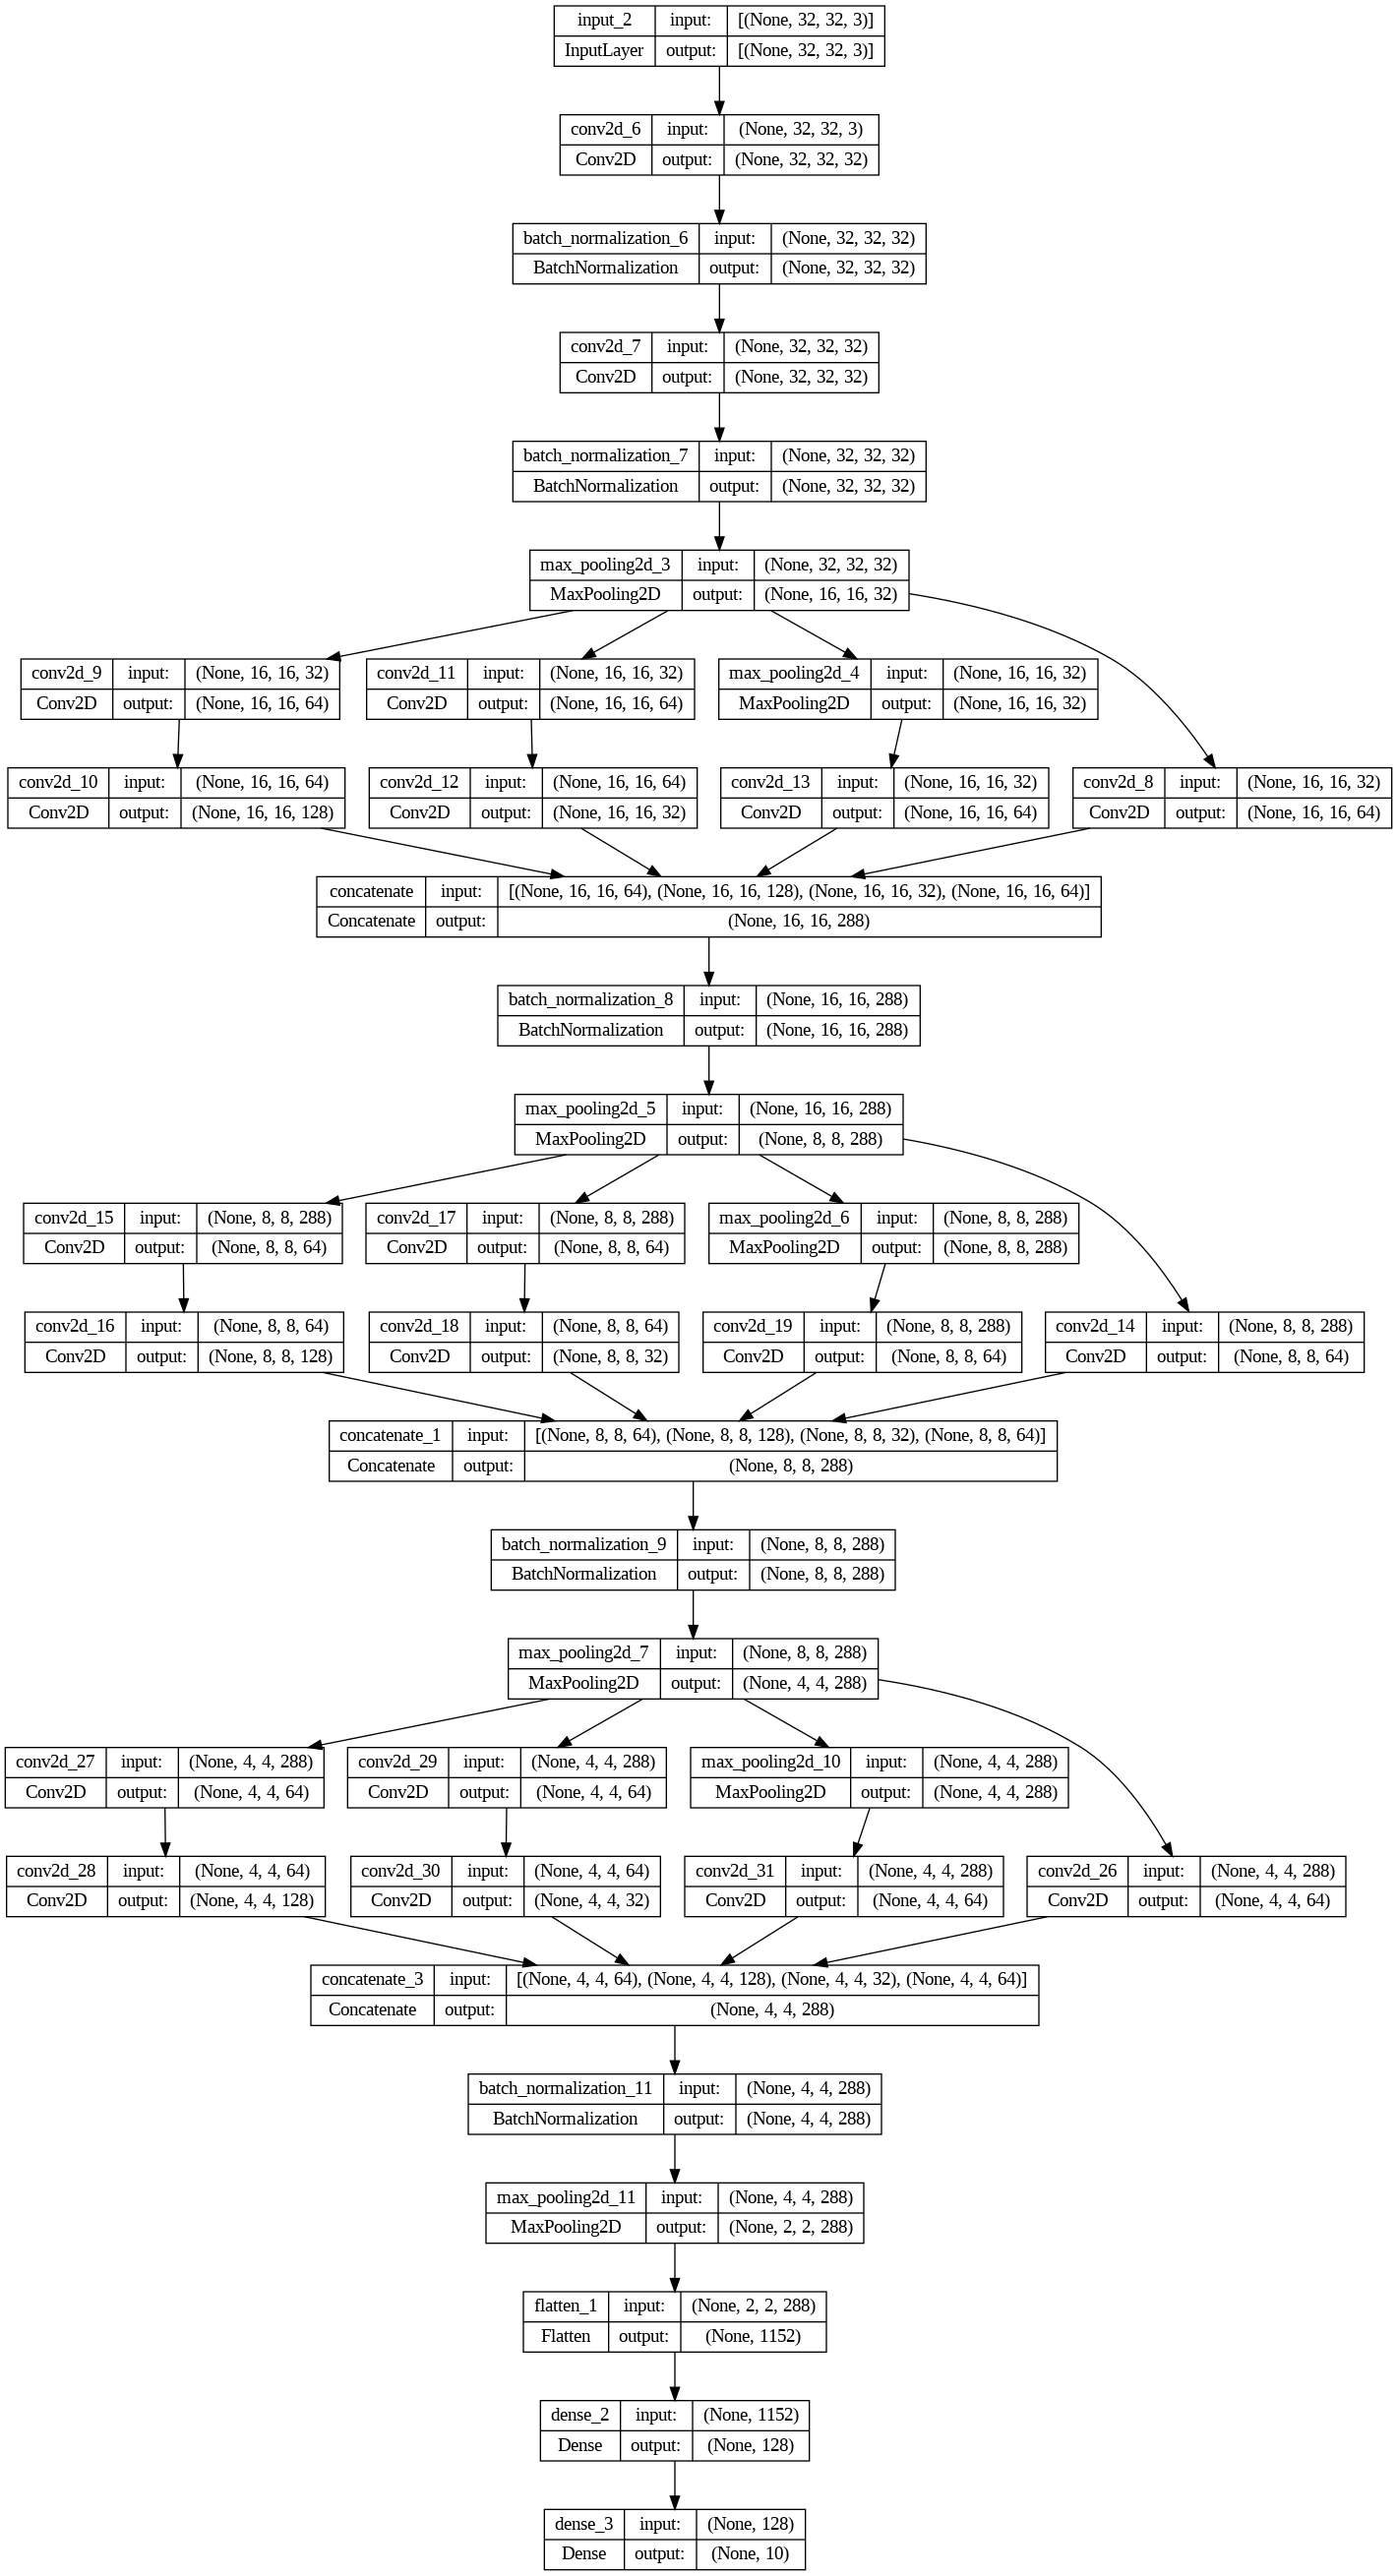

In [ ]:
tf.keras.utils.plot_model(model_with_inception, show_shapes=True)

In [ ]:
model_with_inception.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 32, 32, 32)   896         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 32, 32, 32)  128         ['conv2d_6[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 conv2d_7 (Conv2D)              (None, 32, 32, 32)   9248        ['batch_normalization_6[0][

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_with_inception.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_with_inception = model_with_inception.fit(train_images, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_images, test_labels))

Epoch 1/10
196/196 [==============================] - 23s 60ms/step - loss: 1.3595 - accuracy: 0.5188 - val_loss: 3.8380 - val_accuracy: 0.1594
Epoch 2/10
196/196 [==============================] - 11s 55ms/step - loss: 0.8691 - accuracy: 0.6927 - val_loss: 1.0120 - val_accuracy: 0.6438
Epoch 3/10
196/196 [==============================] - 11s 56ms/step - loss: 0.6548 - accuracy: 0.7708 - val_loss: 0.7899 - val_accuracy: 0.7318
Epoch 4/10
196/196 [==============================] - 11s 56ms/step - loss: 0.5060 - accuracy: 0.8231 - val_loss: 0.8569 - val_accuracy: 0.7200
Epoch 5/10
196/196 [==============================] - 11s 55ms/step - loss: 0.3903 - accuracy: 0.8632 - val_loss: 0.8133 - val_accuracy: 0.7266
Epoch 6/10
196/196 [==============================] - 11s 55ms/step - loss: 0.3006 - accuracy: 0.8940 - val_loss: 0.7778 - val_accuracy: 0.7551
Epoch 7/10
196/196 [==============================] - 11s 54ms/step - loss: 0.2239 - accuracy: 0.9210 - val_loss: 0.8874 - val_accuracy:

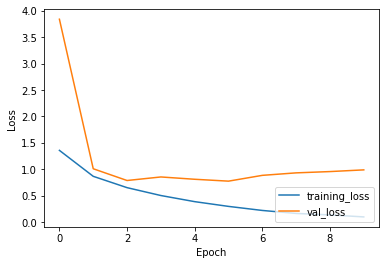

In [ ]:
plt.plot(history_with_inception.history['loss'], label='training_loss')
plt.plot(history_with_inception.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

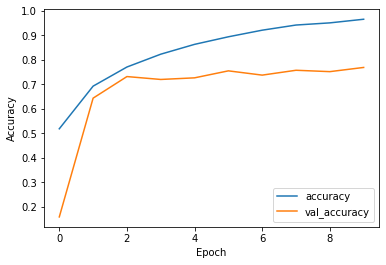

In [ ]:
plt.plot(history_with_inception.history['accuracy'], label='accuracy')
plt.plot(history_with_inception.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model_with_inception.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.9909 - accuracy: 0.7690 - 2s/epoch - 5ms/step


### Skip Connections
---
With very deep networks, we run the risk of vanishing gradients, due to which our model might not perform well. This is where skip connections come in.

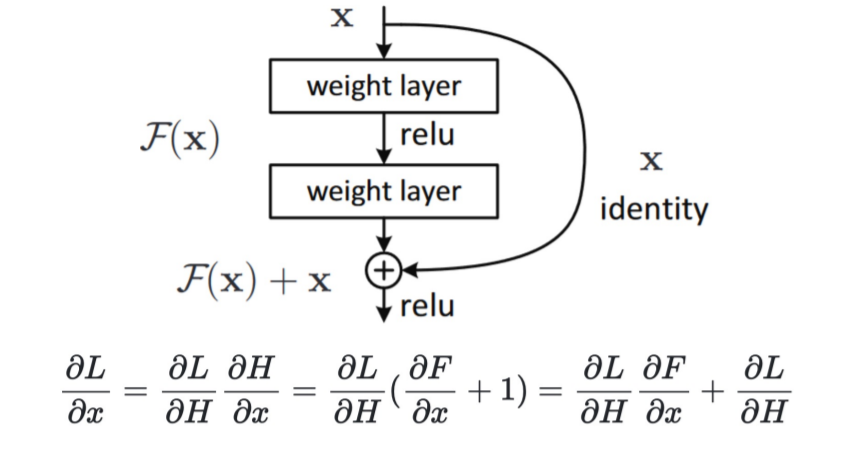

Skip connections provide an alternate path for the gradients to flow, preventing vanishing gradients



## Skip Connection in TensorFlow
---

In [ ]:
def make_model_without_skip_connection(input):
  conv_1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(input)
  bn_1 = BatchNormalization()(conv_1)
  conv_2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(bn_1)
  bn_2 = BatchNormalization()(conv_2)
  pool_1 = MaxPooling2D((2, 2))(bn_2)

  conv_3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_1)
  bn_3 = BatchNormalization()(conv_3)
  conv_4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(bn_3)
  bn_5 = BatchNormalization()(conv_4)
  pool_2 = MaxPooling2D((2, 2))(bn_5)

  conv_5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_2)
  bn_6 = BatchNormalization()(conv_5)
  conv_6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(bn_6)
  bn_7 = BatchNormalization()(conv_6)
  pool_3 = MaxPooling2D((2, 2))(bn_7)

  flatten = Flatten()(pool_3)
  dense_1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flatten)
  output = Dense(10, activation='softmax')(dense_1)

  return output

In [ ]:
input = Input(shape=(32,32,3))
model_without_skip_connection = Model(input, make_model_without_skip_connection(input))

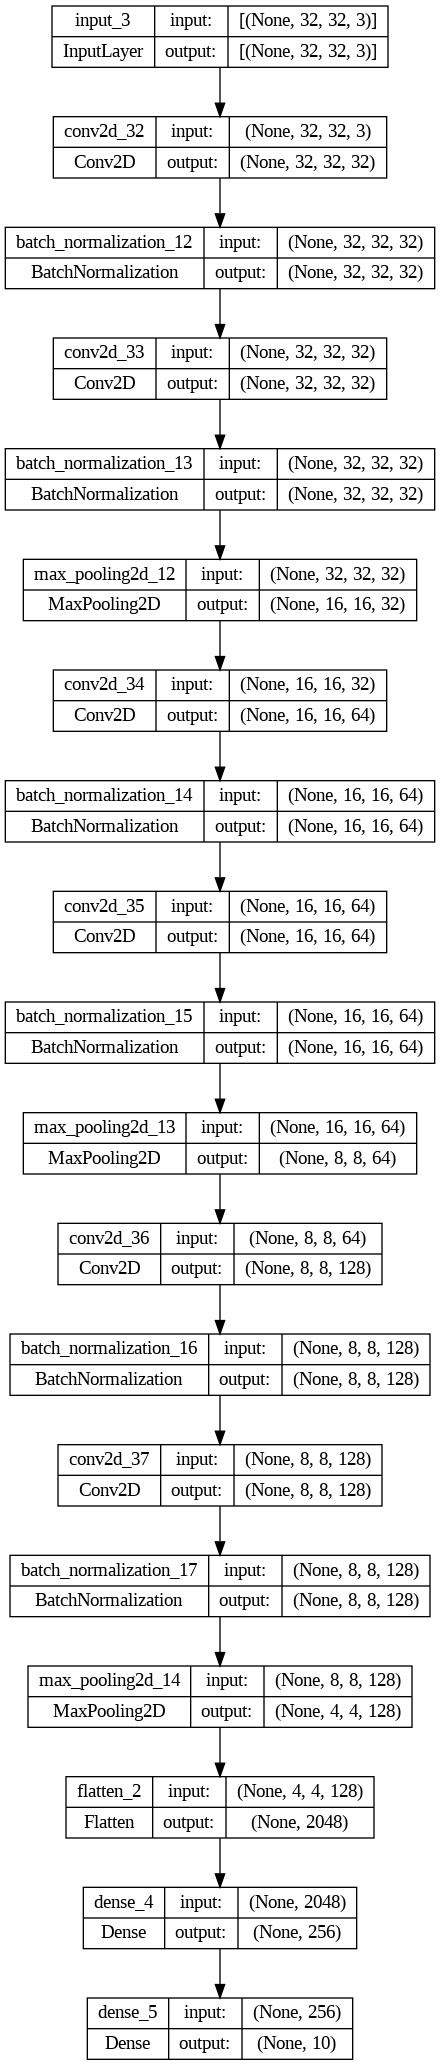

In [ ]:
tf.keras.utils.plot_model(model_without_skip_connection, show_shapes=True)

In [ ]:
model_without_skip_connection.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0   

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_without_skip_connection.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_without_skip_connection = model_without_skip_connection.fit(train_images, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_images, test_labels))

Epoch 1/10
196/196 [==============================] - 11s 33ms/step - loss: 1.4786 - accuracy: 0.5009 - val_loss: 2.3125 - val_accuracy: 0.2427
Epoch 2/10
196/196 [==============================] - 6s 30ms/step - loss: 0.8885 - accuracy: 0.6857 - val_loss: 1.2371 - val_accuracy: 0.5713
Epoch 3/10
196/196 [==============================] - 6s 28ms/step - loss: 0.6763 - accuracy: 0.7615 - val_loss: 0.8276 - val_accuracy: 0.7140
Epoch 4/10
196/196 [==============================] - 6s 29ms/step - loss: 0.5176 - accuracy: 0.8198 - val_loss: 0.7701 - val_accuracy: 0.7396
Epoch 5/10
196/196 [==============================] - 6s 30ms/step - loss: 0.3962 - accuracy: 0.8601 - val_loss: 0.8012 - val_accuracy: 0.7442
Epoch 6/10
196/196 [==============================] - 6s 29ms/step - loss: 0.2869 - accuracy: 0.8994 - val_loss: 0.8405 - val_accuracy: 0.7475
Epoch 7/10
196/196 [==============================] - 6s 28ms/step - loss: 0.1992 - accuracy: 0.9311 - val_loss: 0.8547 - val_accuracy: 0.759

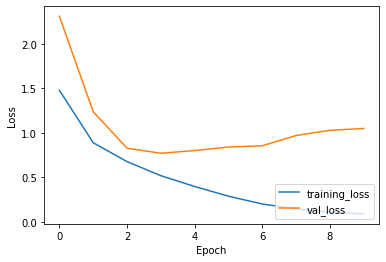

In [ ]:
plt.plot(history_without_skip_connection.history['loss'], label='training_loss')
plt.plot(history_without_skip_connection.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

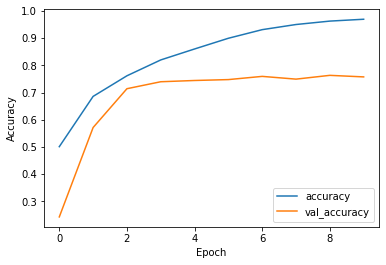

In [ ]:
plt.plot(history_without_skip_connection.history['accuracy'], label='accuracy')
plt.plot(history_without_skip_connection.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model_without_skip_connection.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.0495 - accuracy: 0.7574 - 1s/epoch - 5ms/step


In [ ]:
def make_model_with_skip_connection(input):
  input_1x1 = Conv2D(32, (1, 1), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(input)
  conv_1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3))(input)
  bn_1 = BatchNormalization()(conv_1)
  conv_2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(bn_1)
  bn_2 = BatchNormalization()(conv_2)
  merge_1 = Add()([input_1x1, bn_2])
  bn_3 = BatchNormalization()(merge_1)
  pool_1 = MaxPooling2D((2, 2))(bn_3)

  pool_1_1x1 = Conv2D(64, (1, 1), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_1)
  conv_3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_1)
  bn_4 = BatchNormalization()(conv_3)
  conv_4 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(bn_4)
  bn_5 = BatchNormalization()(conv_4)
  merge_2 = Add()([pool_1_1x1, bn_5])
  bn_6 = BatchNormalization()(merge_2)
  pool_2 = MaxPooling2D((2, 2))(bn_6)

  pool_2_1x1 = Conv2D(128, (1, 1), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_2)
  conv_5 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(pool_2)
  bn_7 = BatchNormalization()(conv_5)
  conv_6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same')(bn_7)
  bn_8 = BatchNormalization()(conv_6)
  merge_3 = Add()([pool_2_1x1, bn_8])
  bn_9 = BatchNormalization()(merge_3)
  pool_3 = MaxPooling2D((2, 2))(bn_9)

  flatten = Flatten()(pool_3)
  dense_1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flatten)
  output = Dense(10, activation='softmax')(dense_1)

  return output

In [ ]:
input = Input(shape=(32,32,3))
model_with_skip_connection = Model(input, make_model_with_skip_connection(input))

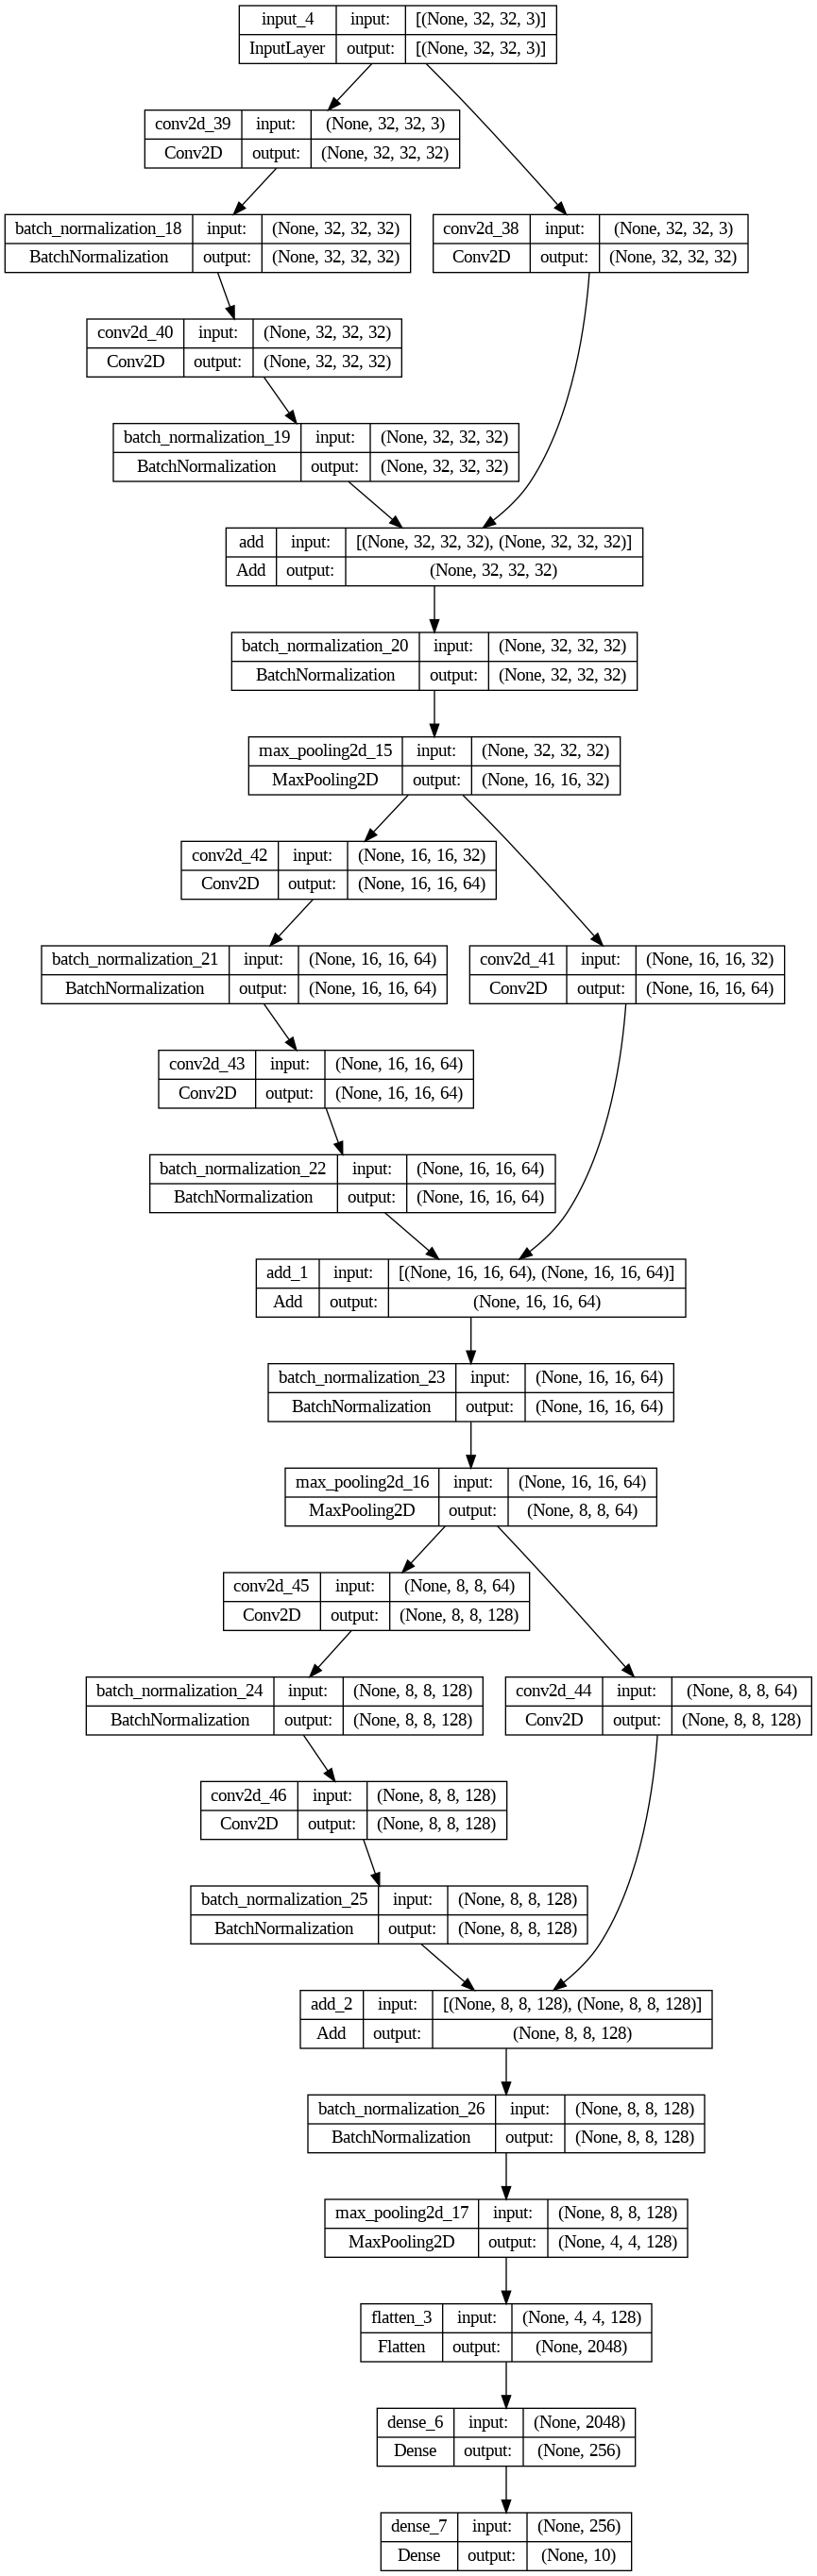

In [ ]:
tf.keras.utils.plot_model(model_with_skip_connection, show_shapes=True)

In [ ]:
model_with_skip_connection.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_39 (Conv2D)             (None, 32, 32, 32)   896         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_18 (BatchN  (None, 32, 32, 32)  128         ['conv2d_39[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_40 (Conv2D)             (None, 32, 32, 32)   9248        ['batch_normalization_18[0]

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_with_skip_connection.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history_with_skip_connection = model_with_skip_connection.fit(train_images, train_labels, epochs=10, batch_size=256,
                    validation_data=(test_images, test_labels))

Epoch 1/10
196/196 [==============================] - 14s 39ms/step - loss: 1.4595 - accuracy: 0.5009 - val_loss: 2.4177 - val_accuracy: 0.2706
Epoch 2/10
196/196 [==============================] - 7s 37ms/step - loss: 0.9155 - accuracy: 0.6761 - val_loss: 1.0643 - val_accuracy: 0.6249
Epoch 3/10
196/196 [==============================] - 7s 36ms/step - loss: 0.6962 - accuracy: 0.7556 - val_loss: 0.8806 - val_accuracy: 0.6960
Epoch 4/10
196/196 [==============================] - 7s 37ms/step - loss: 0.5473 - accuracy: 0.8089 - val_loss: 0.7830 - val_accuracy: 0.7377
Epoch 5/10
196/196 [==============================] - 7s 38ms/step - loss: 0.4108 - accuracy: 0.8567 - val_loss: 0.8081 - val_accuracy: 0.7352
Epoch 6/10
196/196 [==============================] - 7s 37ms/step - loss: 0.3080 - accuracy: 0.8924 - val_loss: 0.8082 - val_accuracy: 0.7475
Epoch 7/10
196/196 [==============================] - 7s 37ms/step - loss: 0.2100 - accuracy: 0.9283 - val_loss: 0.8925 - val_accuracy: 0.746

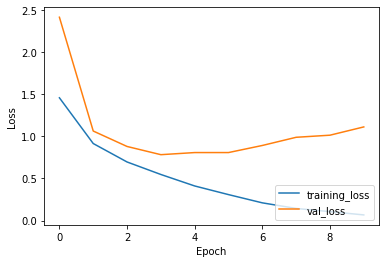

In [ ]:
plt.plot(history_with_skip_connection.history['loss'], label='training_loss')
plt.plot(history_with_skip_connection.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

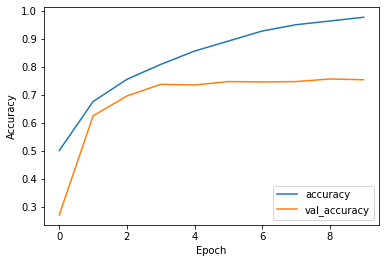

In [ ]:
plt.plot(history_with_skip_connection.history['accuracy'], label='accuracy')
plt.plot(history_with_skip_connection.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
test_loss, test_acc = model_with_skip_connection.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 1.1131 - accuracy: 0.7540 - 1s/epoch - 4ms/step


## Inception in PyTorch
---

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=500, shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data/


In [ ]:
class ModelWithoutInception(nn.Module):

    def __init__(self, input_size=(32,32,3), output_size=10):
        super().__init__()
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn_1 = nn.BatchNorm2d(32)
        self.conv_2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.bn_2 = nn.BatchNorm2d(32)
        self.pool_1 = nn.MaxPool2d(2)

        self.conv_3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn_3 = nn.BatchNorm2d(64)
        self.conv_4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn_4 = nn.BatchNorm2d(64)
        self.pool_2 = nn.MaxPool2d(2)

        self.conv_5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn_5 = nn.BatchNorm2d(128)
        self.conv_6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn_6 = nn.BatchNorm2d(128)
        self.pool_3 = nn.MaxPool2d(2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features = 4*4*128, out_features = 256)
        self.fc2 = nn.Linear(in_features = 256, out_features = 10)

    def forward(self, X):
        X = self.bn_1(F.relu(self.conv_1(X)))
        X = self.bn_2(F.relu(self.conv_2(X)))
        X = self.pool_1(X)

        X = self.bn_3(F.relu(self.conv_3(X)))
        X = self.bn_4(F.relu(self.conv_4(X)))
        X = self.pool_2(X)

        X = self.bn_5(F.relu(self.conv_5(X)))
        X = self.bn_6(F.relu(self.conv_6(X)))
        X = self.pool_3(X)

        X = self.flatten(X)
        X = self.fc1(X)
        X = self.fc2(X)

        return F.log_softmax(X, dim=1)

In [ ]:
model = ModelWithoutInception().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10

train_losses = []
test_losses = []
train_accs = []
test_accs  = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0

    for X_train, y_train in train_loader:

      X_train, y_train = X_train.to(device), y_train.to(device)

      y_pred = model(X_train)
      loss = criterion(y_pred, y_train)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    accuracy = trn_corr.item()*100 / (len(train_dataset))

    train_losses.append(loss)
    train_accs.append(accuracy)


    with torch.no_grad():

      for X_test, y_test in test_loader:

        X_test, y_test = X_test.to(device), y_test.to(device)

        y_val = model(X_test)

        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

    test_accuracy = tst_corr.item()*100 / (len(test_dataset))

    val_loss = criterion(y_val,y_test)
    test_losses.append(val_loss)
    test_accs.append(test_accuracy)
    print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')

epoch: 0 training loss:1.1045693159103394 training accuracy:56.872 val loss:0.8842792510986328 val accuracy:70.18
epoch: 1 training loss:0.49911049008369446 training accuracy:74.43 val loss:0.6774649620056152 val accuracy:77.16
epoch: 2 training loss:0.5647639632225037 training accuracy:80.248 val loss:0.5681336522102356 val accuracy:79.59
epoch: 3 training loss:0.46615269780158997 training accuracy:84.184 val loss:0.6562378406524658 val accuracy:79.65
epoch: 4 training loss:0.5270332098007202 training accuracy:87.24 val loss:0.6112726330757141 val accuracy:80.55
epoch: 5 training loss:0.37337684631347656 training accuracy:89.916 val loss:0.6630806922912598 val accuracy:81.29
epoch: 6 training loss:0.19812293350696564 training accuracy:91.954 val loss:0.691289484500885 val accuracy:80.28
epoch: 7 training loss:0.2069663256406784 training accuracy:93.538 val loss:0.8169039487838745 val accuracy:81.26
epoch: 8 training loss:0.11380651593208313 training accuracy:94.724 val loss:0.92492252

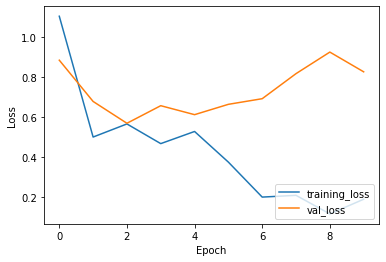

In [ ]:
train_losses = [x.cpu().detach().numpy() for x in train_losses]
test_losses = [x.cpu().detach().numpy()  for x in test_losses]

plt.plot(train_losses, label='training_loss')
plt.plot(test_losses, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

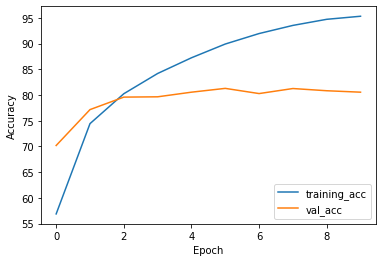

In [ ]:
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
class InceptionLayer(nn.Module):
  def __init__(self, in_channels, f1, f2, f3):
        super().__init__()

        # 1x1 conv
        self.conv1_alone = nn.Conv2d(in_channels=in_channels, out_channels=f1, kernel_size=1, padding=0)

        # 3x3 conv
        self.conv1_3x3 = nn.Conv2d(in_channels=in_channels, out_channels=f1, kernel_size=1, padding=0)
        self.conv3 = nn.Conv2d(in_channels=f1, out_channels=f2, kernel_size=3, padding=1)

        # 5x5 conv
        self.conv1_5x5 = nn.Conv2d(in_channels=in_channels, out_channels=f1, kernel_size=1, padding=0)
        self.conv5 = nn.Conv2d(in_channels=f1, out_channels=f3, kernel_size=5, padding=2)

        # 3x3 max pooling
        self.conv1_pool = nn.Conv2d(in_channels=in_channels, out_channels=f1, kernel_size=1, padding=0)


  def forward(self, X):
      branch1 = F.relu(self.conv1_alone(X))
      branch2 = F.relu(self.conv3(F.relu(self.conv1_3x3(X))))
      branch3 = F.relu(self.conv5(F.relu(self.conv1_5x5(X))))
      branch4 = F.relu(self.conv1_pool((F.pad(X, (0, 0, 0, 0), 'constant', 0.0))))
      return torch.cat([branch1, branch2, branch3, branch4], 1)

In [ ]:
class ModelWithInception(nn.Module):

    def __init__(self, input_size=(32,32,3), output_size=10):
        super().__init__()
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn_1 = nn.BatchNorm2d(32)
        self.conv_2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.bn_2 = nn.BatchNorm2d(32)
        self.pool_1 = nn.MaxPool2d(2)

        self.inception_1 = InceptionLayer(32, 64, 128, 32)
        self.bn_3 = nn.BatchNorm2d(288)
        self.pool_2 = nn.MaxPool2d(2)

        self.inception_2 = InceptionLayer(288, 64, 128, 32)
        self.bn_4 = nn.BatchNorm2d(288)
        self.pool_3 = nn.MaxPool2d(2)

        self.inception_3 = InceptionLayer(288, 64, 128, 32)
        self.bn_5 = nn.BatchNorm2d(288)
        self.pool_4 = nn.MaxPool2d(2)

        self.inception_4 = InceptionLayer(288, 64, 128, 32)
        self.bn_6 = nn.BatchNorm2d(288)
        self.pool_5 = nn.MaxPool2d(2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features = 288, out_features = 128)
        self.fc2 = nn.Linear(in_features = 128, out_features = 10)

    def forward(self, X):
        X = self.bn_1(F.relu(self.conv_1(X)))
        X = self.bn_2(F.relu(self.conv_2(X)))
        X = self.pool_1(X)

        X = self.inception_1(X)
        X = self.bn_3(X)
        X = self.pool_2(X)

        X = self.inception_2(X)
        X = self.bn_4(X)
        X = self.pool_3(X)

        X = self.inception_3(X)
        X = self.bn_5(X)
        X = self.pool_4(X)

        X = self.inception_4(X)
        X = self.bn_6(X)
        X = self.pool_5(X)

        X = self.flatten(X)
        X = self.fc1(X)
        X = self.fc2(X)

        return F.log_softmax(X, dim=1)

In [ ]:
model = ModelWithInception().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10

train_losses = []
test_losses = []
train_accs = []
test_accs  = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0

    for X_train, y_train in train_loader:

      X_train, y_train = X_train.to(device), y_train.to(device)

      y_pred = model(X_train)
      loss = criterion(y_pred, y_train)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    accuracy = trn_corr.item()*100 / (len(train_dataset))

    train_losses.append(loss)
    train_accs.append(accuracy)


    with torch.no_grad():

      for X_test, y_test in test_loader:

        X_test, y_test = X_test.to(device), y_test.to(device)

        y_val = model(X_test)

        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

    test_accuracy = tst_corr.item()*100 / (len(test_dataset))

    val_loss = criterion(y_val,y_test)
    test_losses.append(val_loss)
    test_accs.append(test_accuracy)
    print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')

epoch: 0 training loss:1.005882978439331 training accuracy:58.274 val loss:0.8533176183700562 val accuracy:67.97
epoch: 1 training loss:0.8098797798156738 training accuracy:74.088 val loss:0.7186701893806458 val accuracy:75.41
epoch: 2 training loss:0.7293416857719421 training accuracy:79.722 val loss:0.6425729393959045 val accuracy:78.59
epoch: 3 training loss:0.5059111714363098 training accuracy:83.784 val loss:0.6077682971954346 val accuracy:80.09
epoch: 4 training loss:0.5195797085762024 training accuracy:86.888 val loss:0.591582179069519 val accuracy:79.82
epoch: 5 training loss:0.3615618944168091 training accuracy:89.5 val loss:0.6395249962806702 val accuracy:80.24
epoch: 6 training loss:0.21602997183799744 training accuracy:91.256 val loss:0.6162886619567871 val accuracy:80.47
epoch: 7 training loss:0.36726418137550354 training accuracy:92.864 val loss:0.6857340335845947 val accuracy:81.1
epoch: 8 training loss:0.0998321920633316 training accuracy:94.278 val loss:0.7052324414253

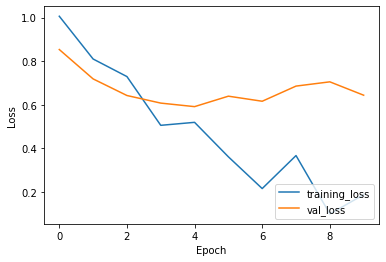

In [ ]:
train_losses = [x.cpu().detach().numpy() for x in train_losses]
test_losses = [x.cpu().detach().numpy()  for x in test_losses]

plt.plot(train_losses, label='training_loss')
plt.plot(test_losses, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

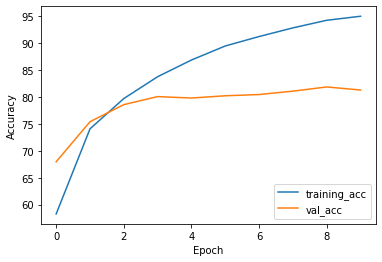

In [ ]:
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

## Skip Connection in PyTorch
---

In [ ]:
class ModelWithoutSkipConnection(nn.Module):

    def __init__(self, input_size=(32,32,3), output_size=10):
        super().__init__()
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn_1 = nn.BatchNorm2d(32)
        self.conv_2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.bn_2 = nn.BatchNorm2d(32)
        self.pool_1 = nn.MaxPool2d(2)

        self.conv_3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn_3 = nn.BatchNorm2d(64)
        self.conv_4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn_4 = nn.BatchNorm2d(64)
        self.pool_2 = nn.MaxPool2d(2)

        self.conv_5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn_5 = nn.BatchNorm2d(128)
        self.conv_6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn_6 = nn.BatchNorm2d(128)
        self.pool_3 = nn.MaxPool2d(2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features = 4*4*128, out_features = 256)
        self.fc2 = nn.Linear(in_features = 256, out_features = 10)

    def forward(self, X):
        X = self.bn_1(F.relu(self.conv_1(X)))
        X = self.bn_2(F.relu(self.conv_2(X)))
        X = self.pool_1(X)

        X = self.bn_3(F.relu(self.conv_3(X)))
        X = self.bn_4(F.relu(self.conv_4(X)))
        X = self.pool_2(X)

        X = self.bn_5(F.relu(self.conv_5(X)))
        X = self.bn_6(F.relu(self.conv_6(X)))
        X = self.pool_3(X)

        X = self.flatten(X)
        X = self.fc1(X)
        X = self.fc2(X)

        return F.log_softmax(X, dim=1)

In [ ]:
model = ModelWithoutSkipConnection().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10

train_losses = []
test_losses = []
train_accs = []
test_accs  = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0

    for X_train, y_train in train_loader:

      X_train, y_train = X_train.to(device), y_train.to(device)

      y_pred = model(X_train)
      loss = criterion(y_pred, y_train)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    accuracy = trn_corr.item()*100 / (len(train_dataset))

    train_losses.append(loss)
    train_accs.append(accuracy)


    with torch.no_grad():

      for X_test, y_test in test_loader:

        X_test, y_test = X_test.to(device), y_test.to(device)

        y_val = model(X_test)

        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

    test_accuracy = tst_corr.item()*100 / (len(test_dataset))

    val_loss = criterion(y_val,y_test)
    test_losses.append(val_loss)
    test_accs.append(test_accuracy)
    print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')

epoch: 0 training loss:0.8927643299102783 training accuracy:57.978 val loss:0.8637034296989441 val accuracy:70.8
epoch: 1 training loss:0.5682991147041321 training accuracy:74.802 val loss:0.699318528175354 val accuracy:76.48
epoch: 2 training loss:0.35086578130722046 training accuracy:80.402 val loss:0.6405653357505798 val accuracy:78.36
epoch: 3 training loss:0.4840749502182007 training accuracy:84.318 val loss:0.6018633246421814 val accuracy:80.16
epoch: 4 training loss:0.5937787890434265 training accuracy:87.478 val loss:0.5717595815658569 val accuracy:80.45
epoch: 5 training loss:0.4168657660484314 training accuracy:90.23 val loss:0.6717875003814697 val accuracy:81.17
epoch: 6 training loss:0.34087076783180237 training accuracy:92.128 val loss:0.6575684547424316 val accuracy:80.7
epoch: 7 training loss:0.21643377840518951 training accuracy:93.68 val loss:0.6872089505195618 val accuracy:81.27
epoch: 8 training loss:0.2696807384490967 training accuracy:94.81 val loss:0.7838580608367

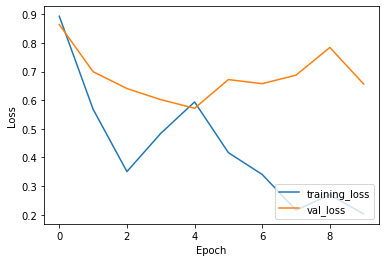

In [ ]:
train_losses = [x.cpu().detach().numpy() for x in train_losses]
test_losses = [x.cpu().detach().numpy()  for x in test_losses]

plt.plot(train_losses, label='training_loss')
plt.plot(test_losses, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

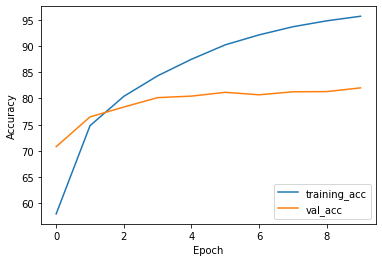

In [ ]:
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
class ModelWithSkipConnection(nn.Module):

    def __init__(self, input_size=(32,32,3), output_size=10):
        super().__init__()
        self.input_1x1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=1, padding=0)
        self.conv_1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn_1 = nn.BatchNorm2d(32)
        self.conv_2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.bn_2 = nn.BatchNorm2d(32)
        self.bn_3 = nn.BatchNorm2d(32)
        self.pool_1 = nn.MaxPool2d(2)

        self.pool_1_1x1 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=1, padding=0)
        self.conv_3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn_4 = nn.BatchNorm2d(64)
        self.conv_4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
        self.bn_5 = nn.BatchNorm2d(64)
        self.bn_6 = nn.BatchNorm2d(64)
        self.pool_2 = nn.MaxPool2d(2)

        self.pool_2_1x1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=1, padding=0)
        self.conv_5 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn_7 = nn.BatchNorm2d(128)
        self.conv_6 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.bn_8 = nn.BatchNorm2d(128)
        self.bn_9 = nn.BatchNorm2d(128)
        self.pool_3 = nn.MaxPool2d(2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features = 4*4*128, out_features = 256)
        self.fc2 = nn.Linear(in_features = 256, out_features = 10)

    def forward(self, X):
        X_1 = X
        X = self.bn_1(F.relu(self.conv_1(X)))
        X = self.bn_2(F.relu(self.conv_2(X)))
        X = self.bn_3(torch.add(F.relu(self.input_1x1(X_1)), X))
        X = self.pool_1(X)

        X_1 = X
        X = self.bn_4(F.relu(self.conv_3(X)))
        X = self.bn_5(F.relu(self.conv_4(X)))
        X = self.bn_6(torch.add(F.relu(self.pool_1_1x1(X_1)), X))
        X = self.pool_2(X)

        X_1 = X
        X = self.bn_7(F.relu(self.conv_5(X)))
        X = self.bn_8(F.relu(self.conv_6(X)))
        X = self.bn_9(torch.add(F.relu(self.pool_2_1x1(X_1)), X))
        X = self.pool_3(X)

        X = self.flatten(X)
        X = self.fc1(X)
        X = self.fc2(X)

        return F.log_softmax(X, dim=1)

In [ ]:
model = ModelWithSkipConnection().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 10

train_losses = []
test_losses = []
train_accs = []
test_accs  = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    batch_corr = 0

    for X_train, y_train in train_loader:

      X_train, y_train = X_train.to(device), y_train.to(device)

      y_pred = model(X_train)
      loss = criterion(y_pred, y_train)

      predicted = torch.max(y_pred.data, 1)[1]
      batch_corr = (predicted == y_train).sum()
      trn_corr += batch_corr


      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    accuracy = trn_corr.item()*100 / (len(train_dataset))

    train_losses.append(loss)
    train_accs.append(accuracy)


    with torch.no_grad():

      for X_test, y_test in test_loader:

        X_test, y_test = X_test.to(device), y_test.to(device)

        y_val = model(X_test)

        predicted = torch.max(y_val.data, 1)[1]
        tst_corr += (predicted == y_test).sum()

    test_accuracy = tst_corr.item()*100 / (len(test_dataset))

    val_loss = criterion(y_val,y_test)
    test_losses.append(val_loss)
    test_accs.append(test_accuracy)
    print( f'epoch: {i} training loss:{loss.item()} training accuracy:{accuracy} val loss:{val_loss.item()} val accuracy:{test_accuracy}')

epoch: 0 training loss:0.9434956908226013 training accuracy:57.448 val loss:0.8815168142318726 val accuracy:69.35
epoch: 1 training loss:0.7790377736091614 training accuracy:74.21 val loss:0.667023241519928 val accuracy:75.16
epoch: 2 training loss:0.5207796692848206 training accuracy:79.64 val loss:0.6438539028167725 val accuracy:78.62
epoch: 3 training loss:0.4920438528060913 training accuracy:83.81 val loss:0.6210627555847168 val accuracy:80.39
epoch: 4 training loss:0.2669846713542938 training accuracy:86.922 val loss:0.6166249513626099 val accuracy:80.86
epoch: 5 training loss:0.23626652359962463 training accuracy:89.692 val loss:0.6273240447044373 val accuracy:81.46
epoch: 6 training loss:0.37987861037254333 training accuracy:91.654 val loss:0.6813933849334717 val accuracy:80.6
epoch: 7 training loss:0.19391502439975739 training accuracy:93.382 val loss:0.7216792106628418 val accuracy:81.06
epoch: 8 training loss:0.18930821120738983 training accuracy:94.578 val loss:0.91073852777

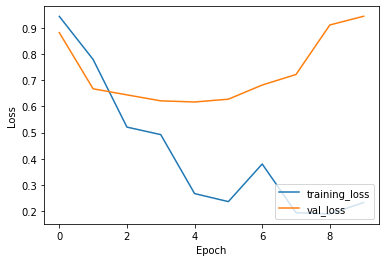

In [ ]:
train_losses = [x.cpu().detach().numpy() for x in train_losses]
test_losses = [x.cpu().detach().numpy()  for x in test_losses]

plt.plot(train_losses, label='training_loss')
plt.plot(test_losses, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

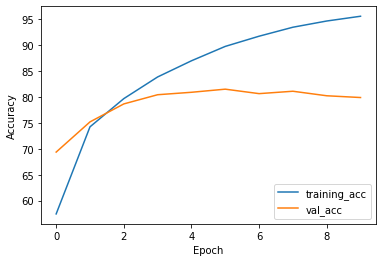

In [ ]:
plt.plot(train_accs, label='training_acc')
plt.plot(test_accs, label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


## CNN Output Size and Parameter Calculation

## Input
Input to a CNN is an image of size $$H * W * C$$ where $H$ is height of the image, $W$ is width of the image and $C$ is the number of channels. $C=1$ for a grayscale image and $C=3$ for a color image (channels are R, G, B).

----

## Conv Layer
Has four hyperparameters:
- Number of filters $K$,
- filter size (spatial extent) $F$,
- stride $S$,
- amount of padding $P$

Conv Layer outputs a volume of size $$OW*OH*OD$$
where $$OW=\frac{(W−F+2P)}{S}+1$$
<br>
$$OH=\frac{(H−F+2P)}{S}+1$$
<br>
$$OD=K$$

We can also say the number of activations = $OW*OH*OD$, since each element of the output is the result of an activation.


The number of parameters = $((F*F*C)*K) + K$

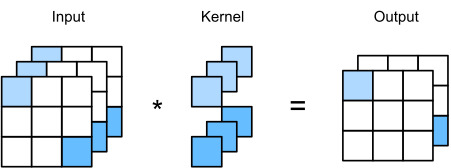

---------

For example,

Lets take an image of size 5x5x3. Therefore $$H =5, W =5, C=3$$

Conv layer has hyperparameters:
$$K=2, F=3, S=2,P=1$$

Lets calculate output of Conv layer which is $$OW*OH*OD$$

$$OW=\frac{(W−F+2P)}{S}+1 = \frac{(5-3+2)}{2} + 1 = 3$$
$$OH=\frac{(H−F+2P)}{S}+1 = \frac{(5-3+2)}{2} + 1 = 3$$
$$OD=K = 2$$

Therefore, output of the above conv layer for the given image size will be 3x3x2.

The number of parameters = $(3*3*3)*2 + 2$ = 56

-----
## Pooling Layer

This layer reduces size of the representation or input which helps in reducing amount of parameters and computation during training.

Input to pooling layer of size:
$$H * W * C$$

Has two hyperparameters:
- Size(spatial extent) $F$,
- Stride $S$

Produces a volume of size $$OW*OH*OD$$

where
$$OW=\frac{(W−F)}{S}+1$$
$$OH=\frac{(H−F)}{S}+1$$
$$OD=C$$

For example,

Input to pooling layer is $4*4*1$ with $F=2$ and $S=2$.

Then, output of the pooling layer would be:
$$2*2*1$$

because,
$$OW=\frac{(W−F)}{S}+1 = \frac{4-2}{2}+1 = 2$$
$$OH=\frac{(H−F)}{S}+1 = \frac{4-2}{2}+1 = 2$$
$$OD=C = 1$$

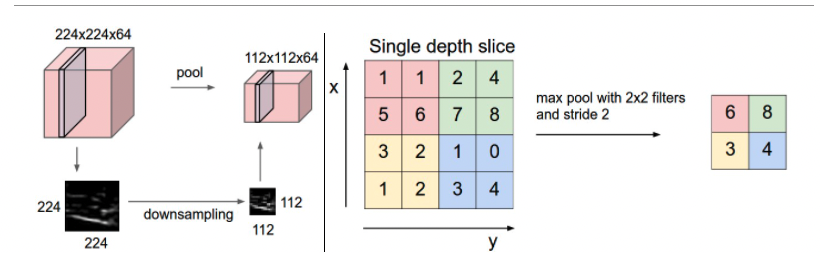

ref: cs231n notes
----



## Dense(Linear) Layer

Input of size $X*1$

Requires a parameter:
- Number of Neurons $N$

Outputs a size of $N*1$

Number of parameters = $X*N + X$

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

model = Sequential()

## input size = 32 x 32 x 3
model.add(layers.Conv2D(filters=8 , kernel_size=(5,5), activation='relu', strides=(1,1), padding='valid', input_shape=(32,32,3)))
## output size = (32 - 5 + 2*0)/1 + 1 * (32 - 5 + 2*0)/1 + 1 * (8)  = 28*28*8
## parameters = (5*5*3)*8 + 8 = 608

model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))
## output size = (28-2)/2 + 1 * (28-2)/2 + 1 * (8) = 14*14*8
## parameters = 0

model.add(layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', strides=(1,1), activation='relu'))
## output size = (14 - 5 + 2*0)/1 + 1 * (14 - 5 + 2*0)/1 + 1 * (16)  = 10*10*16
## parameters = (5*5*8)*16 + 16 = 3216

model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))
## output size = (10-2)/2 + 1 * (10-2)/2 + 1 * (16) = 5*5*16
## parameters = 0

model.add(layers.Flatten())
## output size = 5*5*16 = 400

model.add(layers.Dense(128, activation='relu'))
## output size = 128
## parameters = 400*128 + 128 = 51328

model.add(layers.Dense(64, activation='relu'))
## output size = 64
## parameters = 128*64 + 64 = 8256


model.add(layers.Dense(10, activation='softmax'))
## output size = 10
## parameters = 64*10 + 10 = 650

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 128)               5

## Summary

For an input $W*H*C$

- Conv Layer with number of filters $K$, size $(F*F)$, padding $P$, stride $S$
  - Output Size = ($\frac{W−F+2P}{S}+1$) * ($\frac{H−F+2P}{S}+1$) * $K$
  - Parameters = $(F*F*C)*K + K$
- Pooling Layer with size $(F*F)$, padding $P$
  - Output Size = ($\frac{W−F}{S}+1$) * ($\frac{H−F}{S}+1$) * $C$
  - Parameters = 0


Dense Layer with input size $X$ and output size $N$
  - Output Size = N
  - Parameters = $X*N$ + $X$


## Exercise
Compute output sizes of each layer in the given CNN

In [ ]:
model = Sequential()

model.add(layers.Conv2D(filters=8 , kernel_size=(5,5), activation='relu', strides=(1,1), padding='valid', input_shape=(10,10,3)))
## output size = (10 - 5 + 2*0)/1 + 1 * (10 - 5 + 2*0)/1 + 1 * (8)  = 6*6*8
## parameters = (5*5*3)*8 + 8 = 608

model.add(layers.MaxPooling2D(pool_size=(2,2), strides=2))
## output size = (6-2)/2 + 1 * (6-2)/2 + 1 * (8) = 5*5*8
## parameters = 0

model.add(layers.Flatten())
## output size = 72

model.add(layers.Dense(10, activation='relu'))
## output size = 10
## parameters = 72*10 + 10 = 730

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 6, 6, 8)           608       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 8)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 72)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                730       
                                                                 
Total params: 1,338
Trainable params: 1,338
Non-trainable params: 0
_________________________________________________________________
